# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

### Getting the data:
We need to get the data where we can find it.   Copy automobile_price_data3.csv into the same Getting the data:

* Assignment is not an expression. Nothing is displayed.
* Print will cause something to be displayed.
* The last expression evaluated in a cell will be displayed.

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
data_frame = pd.read_csv("automobile_price_data3.csv")
print(data_frame.keys())
print()

data_frame.drop(axis="columns", labels="normalized-losses", inplace=True)

data_frame.dropna(axis="index", how="any", inplace=True)

data_frame.head(n=10)
data_frame.info()
data_frame.tail(n=5)

Index(['normalized-losses', 'make', 'fuel', 'doors', 'body', 'drive', 'weight',
       'engine-size', 'bhp', 'mpg', 'price'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         197 non-null    object 
 1   fuel         197 non-null    object 
 2   doors        197 non-null    object 
 3   body         197 non-null    object 
 4   drive        197 non-null    object 
 5   weight       197 non-null    int64  
 6   engine-size  197 non-null    int64  
 7   bhp          197 non-null    float64
 8   mpg          197 non-null    int64  
 9   price        197 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 16.9+ KB


,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
200,volvo,unleaded,four,saloon,rwd,2952,141,114.0,28,16845.0
201,volvo,unleaded,four,saloon,rwd,3049,141,160.0,25,19045.0
202,volvo,unleaded,four,saloon,rwd,3012,173,134.0,23,21485.0
203,volvo,diesel,four,saloon,rwd,3217,145,106.0,27,22470.0
204,volvo,unleaded,four,saloon,rwd,3062,141,114.0,25,22625.0


array([[<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bhp'}>, <Axes: title={'center': 'mpg'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

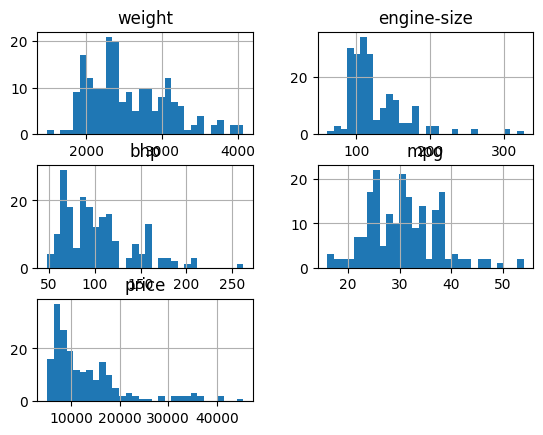

In [15]:
data_frame.hist(bins=30) # type: ignore

### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

### Create and train a model
We need to split the data into a training set and a test set

In [16]:
train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
data_frame.head(n=10)

157 40


,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
0,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,13495.0
1,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,16500.0
2,alfa-romero,unleaded,two,hatchback,rwd,2823,152,154.0,26,16500.0
3,audi,unleaded,four,saloon,fwd,2337,109,102.0,30,13950.0
4,audi,unleaded,four,saloon,4wd,2824,136,115.0,22,17450.0
5,audi,unleaded,two,saloon,fwd,2507,136,110.0,25,15250.0
6,audi,unleaded,four,saloon,fwd,2844,136,110.0,25,17710.0
7,audi,unleaded,four,wagon,fwd,2954,136,110.0,25,18920.0
8,audi,unleaded,four,saloon,fwd,3086,131,140.0,20,23875.0
10,bmw,unleaded,two,saloon,rwd,2395,108,101.0,29,16430.0


In [17]:
reg = LinearRegression()

X = train_set[["weight", "engine-size", "bhp", "mpg"]]
y = train_set["price"]

reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Determine the performance of the model

In [18]:
print("The bias is " , reg.intercept_) # type: ignore
print("The feature coefficients are ", reg.coef_) # type: ignore
print("The score for the training set is", reg.score(X,y)) # type: ignore

# Check the performance on the test set
X_test = test_set[["weight", "engine-size", "bhp", "mpg"]] # type: ignore
y_test = test_set["price"] # type: ignore
print("The score for the test set is", reg.score(X_test,y_test)) # type: ignore

The bias is  -17922.52413652654
The feature coefficients are  [ 4.58631495 82.32373485 66.79759309 72.85364667]
The score for the training set is 0.8230155353613751
The score for the test set is 0.5528901621626463
